Description
Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Multi, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company has to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced package.

Objective

To predict which customer is more likely to purchase the long term travel package.

Data Dictionary

Customer details:

    CustomerID: Unique customer ID
    ProdTaken: Product taken flag
    Age: Age of customer
    PreferredLoginDevice: Preferred login device of the customer in last month
    CityTier: City tier
    Occupation: Occupation of customer
    Gender: Gender of customer
    NumberOfPersonVisited: Total number of person came with customer
    PreferredPropertyStar: Preferred hotel property rating by customer
    MaritalStatus: Marital status of customer
    NumberOfTrips: Average number of the trip in a year by customer
    Passport: Customer passport flag
    OwnCar: Customers owns a car flag
    NumberOfChildrenVisited: Total number of children visit with customer
    Designation: Designation of the customer in the current organization
    MonthlyIncome: Gross monthly income of the customer
    Customer interaction data: 

    PitchSatisfactionScore: Sales pitch satisfactory score
    ProductPitched: Product pitched by a salesperson
    NumberOfFollowups: Total number of follow up has been done by sales person after sales pitch
    DurationOfPitch: Duration of the pitch by a salesman to customer
    Submission Guidelines :
        it is submitted post-deadline, or,
        more than 2 files are submitted


# 1. Perform an Exploratory Data Analysis on the data
- Univariate analysis 
- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights
- Come up with a customer profile (characteristics of a customer) of the different packages 
- Any other exploratory deep dive

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from pandas import ExcelWriter
from pandas import ExcelFile
import warnings
warnings.filterwarnings('ignore')

In [327]:
#tour = pd.read_excel(open('Tourism.xlsx','rb'), sheet_name='Tourism')
tour = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')
df = tour.copy()

In [328]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [329]:
df.shape

(4888, 20)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [332]:
df.nunique()

CustomerID                 4888
ProdTaken                     2
Age                          44
TypeofContact                 2
CityTier                      3
DurationOfPitch              34
Occupation                    4
Gender                        3
NumberOfPersonVisited         5
NumberOfFollowups             6
ProductPitched                5
PreferredPropertyStar         3
MaritalStatus                 4
NumberOfTrips                12
Passport                      2
PitchSatisfactionScore        5
OwnCar                        2
NumberOfChildrenVisited       4
Designation                   5
MonthlyIncome              2475
dtype: int64

# Observations
    1. Typeofcontact, occupation, Gender, ProductPitched, MaritalStatus, Designation are object type, rest are all numerci type
    2.  Age, TypeofContact,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips, NumberOfChildrenVisited, MonthlyIncome, these fields are having missing data.


In [334]:
# Summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [335]:
pd.DataFrame(df.isnull().sum(), columns=['No of MissingValues'])

,No of MissingValues
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisited,0
NumberOfFollowups,45


In [336]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [457]:
tour['ProdTaken'].value_counts()

0    3968
1     920
Name: ProdTaken, dtype: int64

# EDA 

In [337]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'],
      dtype='object')

<AxesSubplot:>

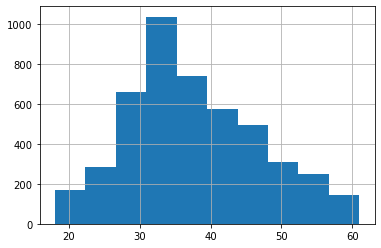

In [284]:
df['Age'].hist()

<AxesSubplot:>

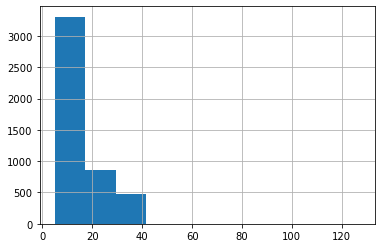

In [287]:
df['DurationOfPitch'].hist()

<AxesSubplot:>

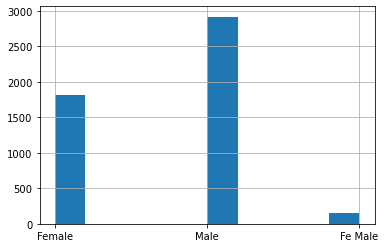

In [288]:
df['Gender'].hist()

<AxesSubplot:>

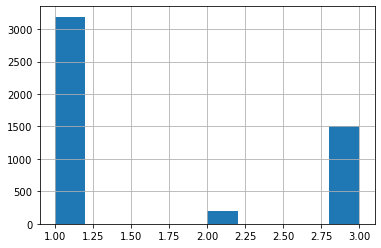

In [286]:
df['CityTier'].hist()

<AxesSubplot:xlabel='Age', ylabel='count'>

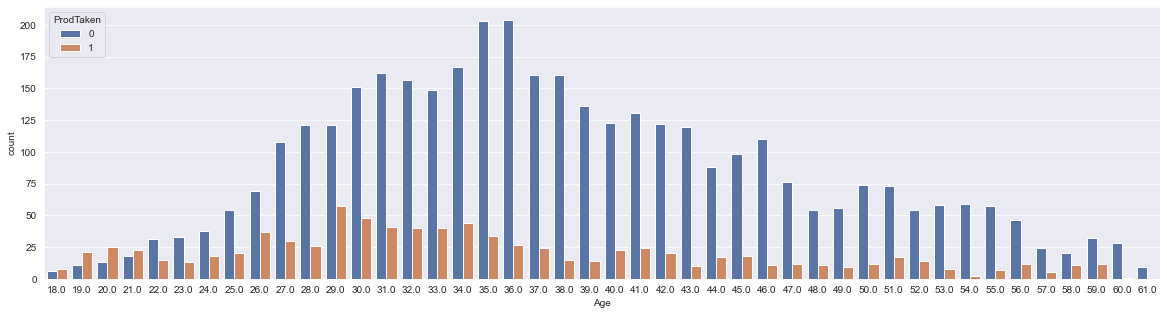

In [289]:
sns.set({'figure.figsize':(20,5)})
sns.countplot(x='Age',data=df,hue='ProdTaken')

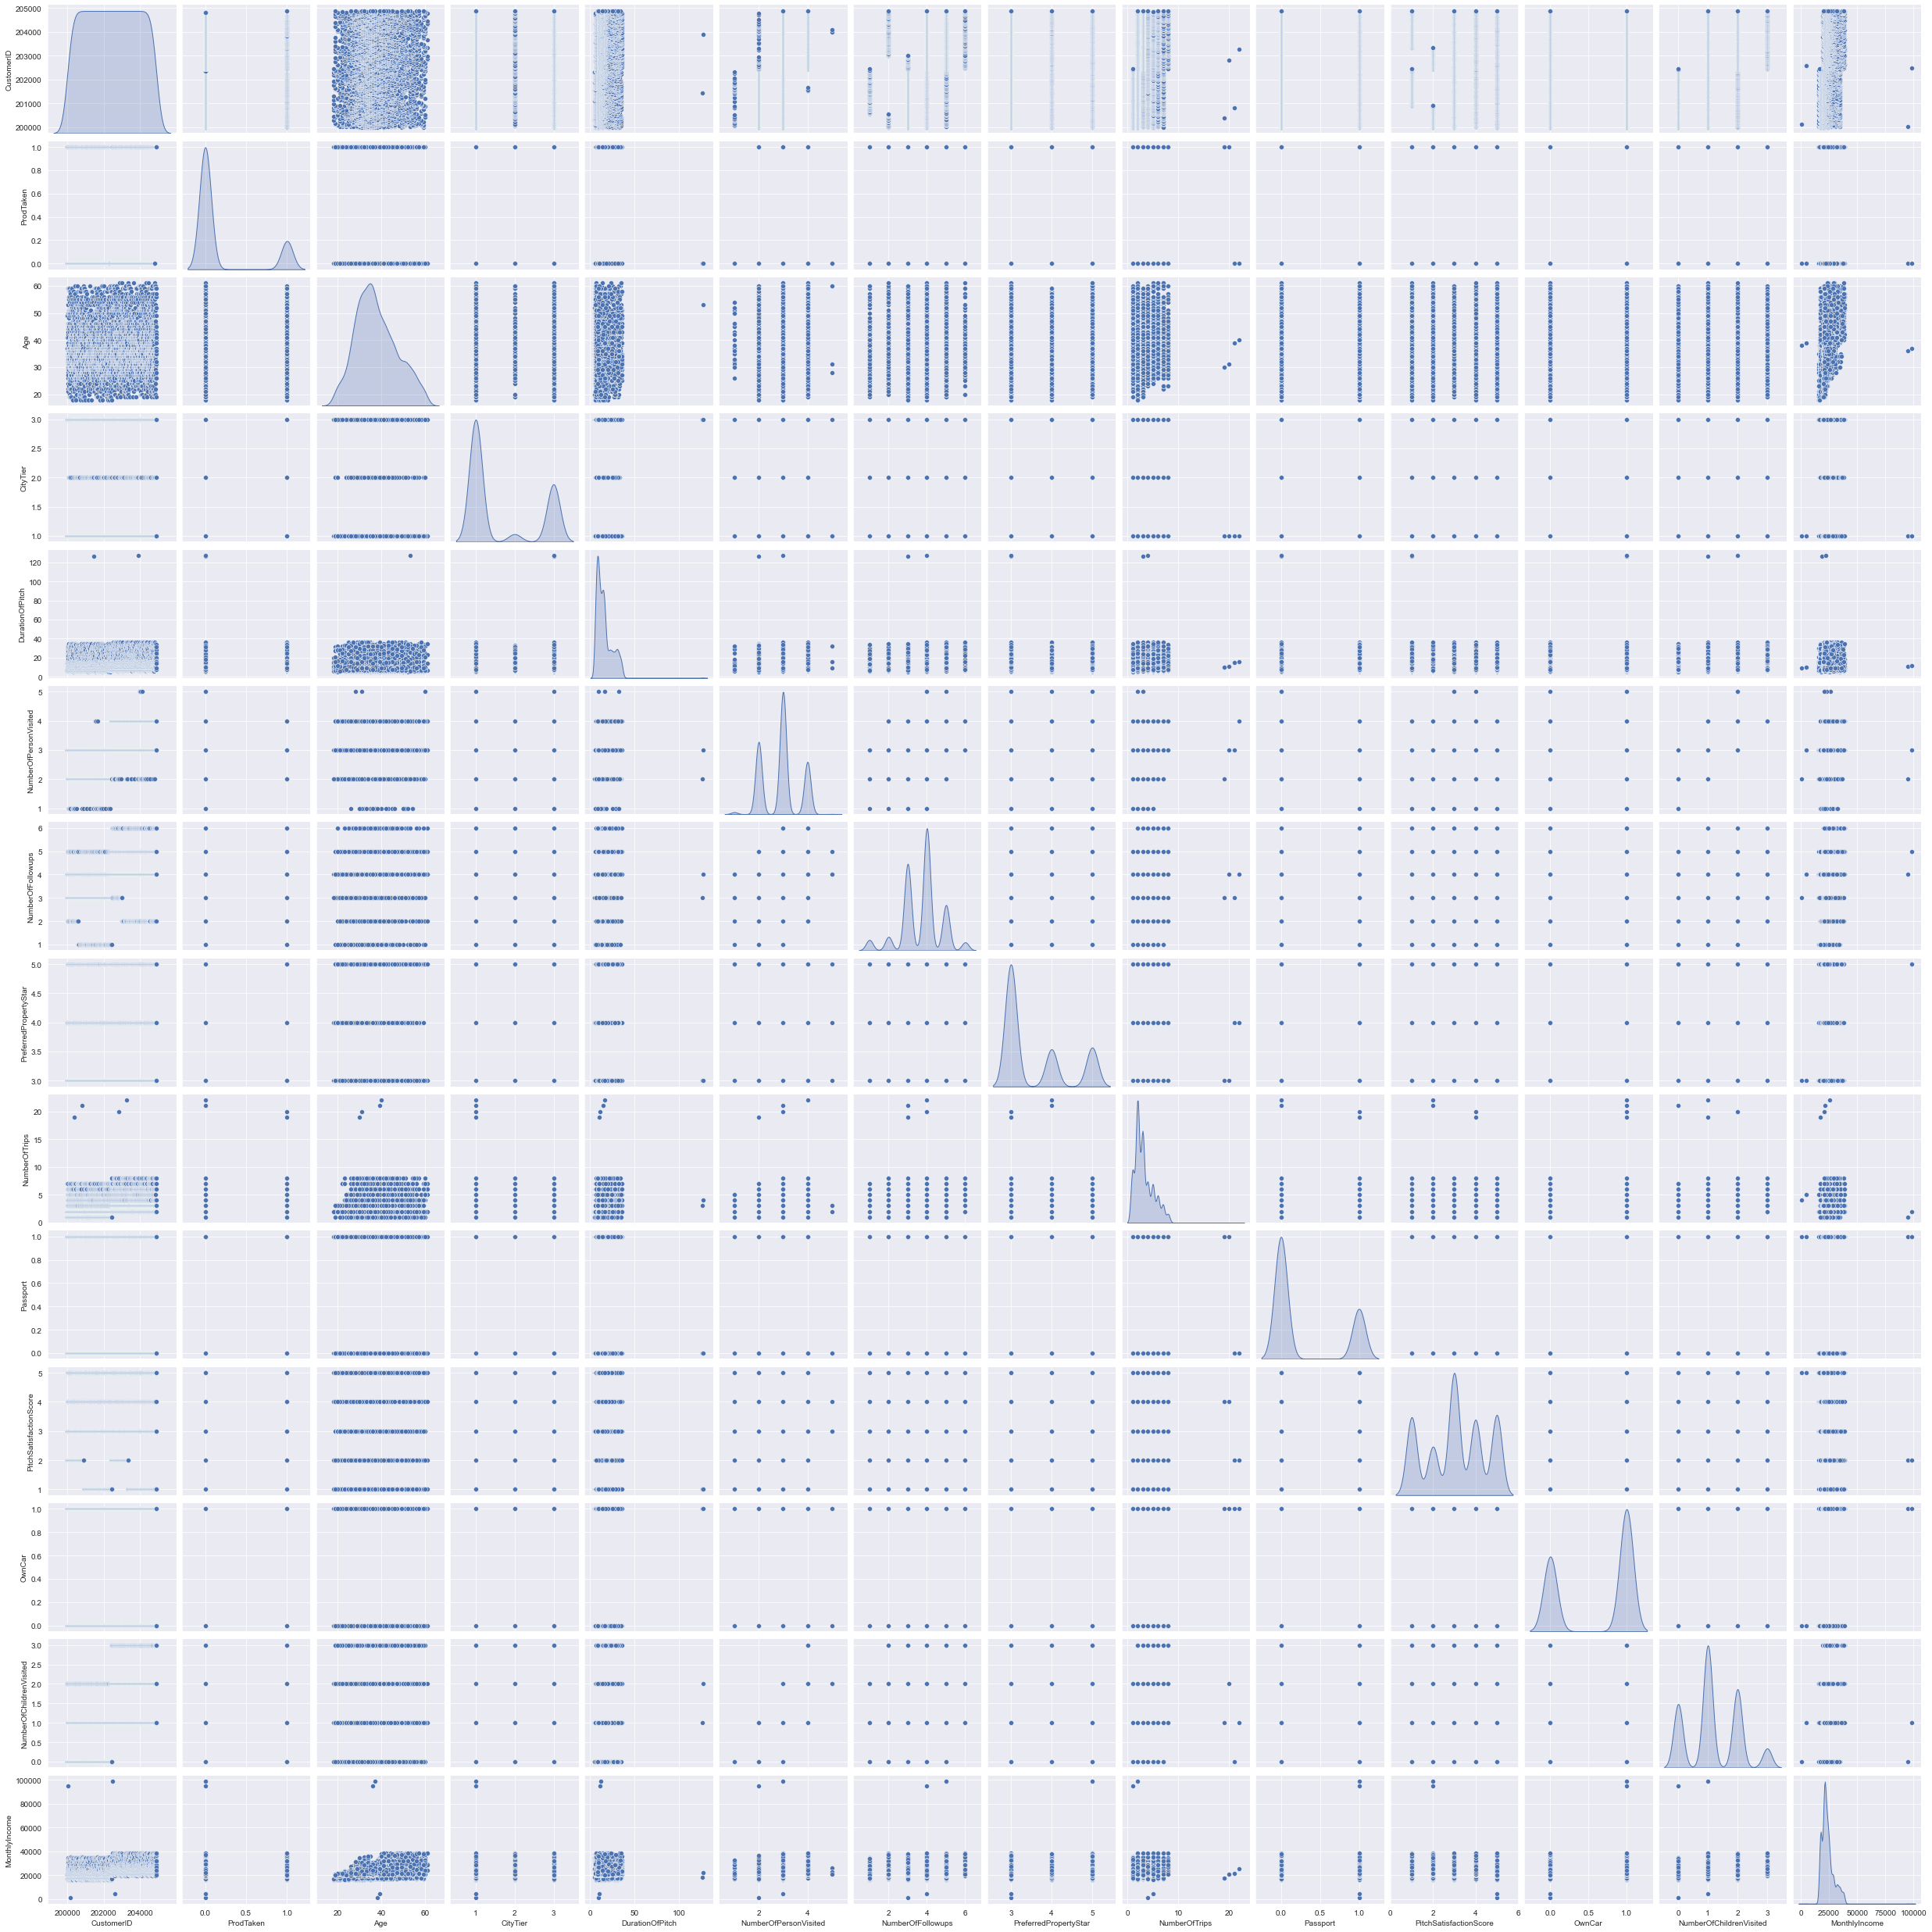

In [290]:
sns.set({'figure.figsize':(10,5)})
sns.pairplot(data =df,diag_kind ='kde')

 'CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome'

In [85]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

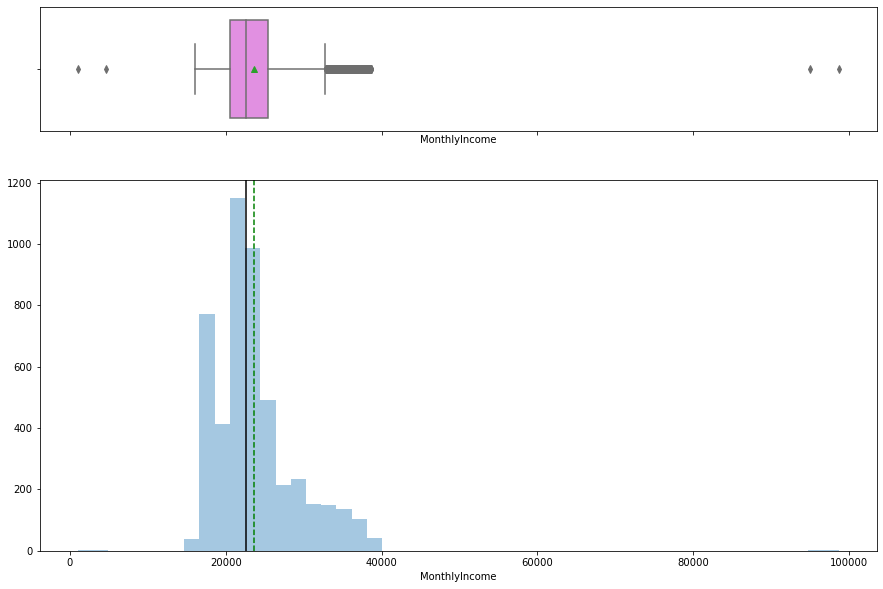

In [86]:
histogram_boxplot(df['MonthlyIncome'])

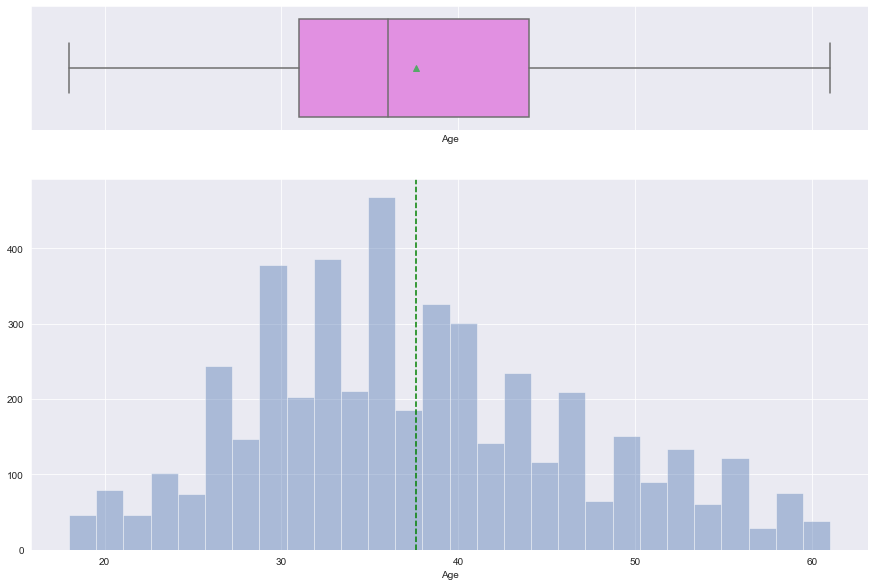

In [291]:
histogram_boxplot(df['Age'])

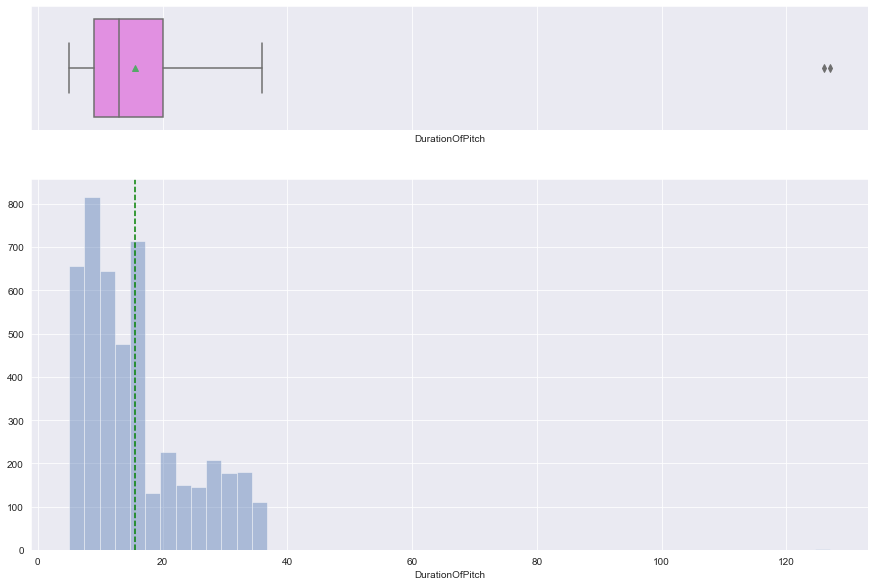

In [293]:
histogram_boxplot(df['DurationOfPitch'])

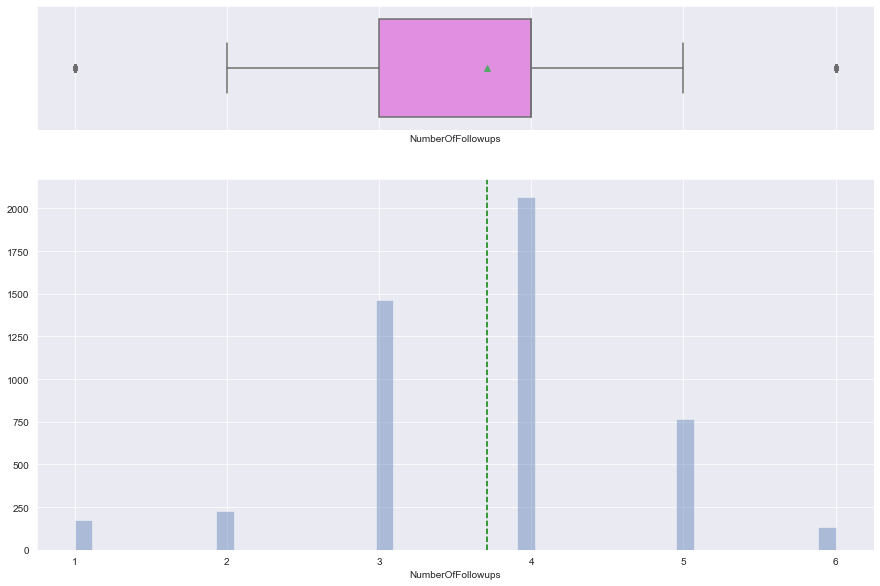

In [294]:
histogram_boxplot(df['NumberOfFollowups'])

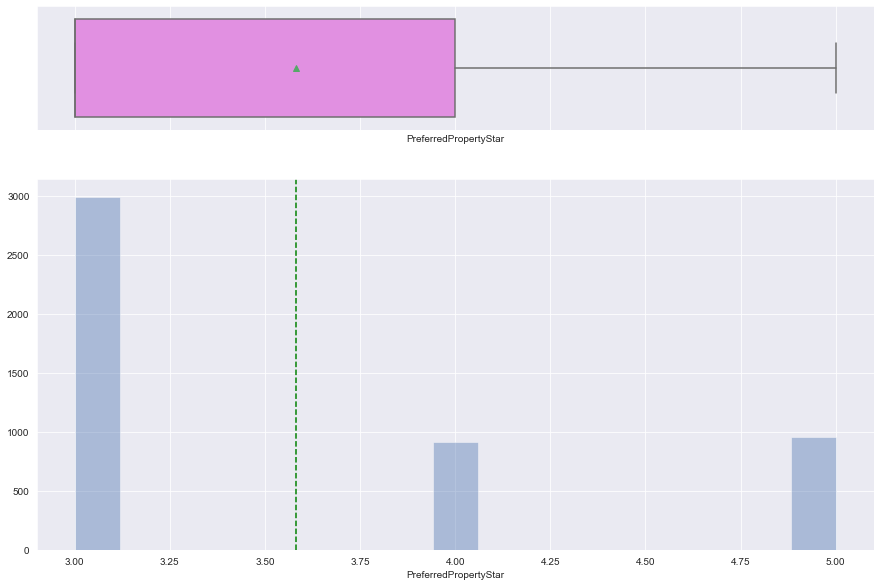

In [296]:
histogram_boxplot(df['PreferredPropertyStar'])

# Bivariate 

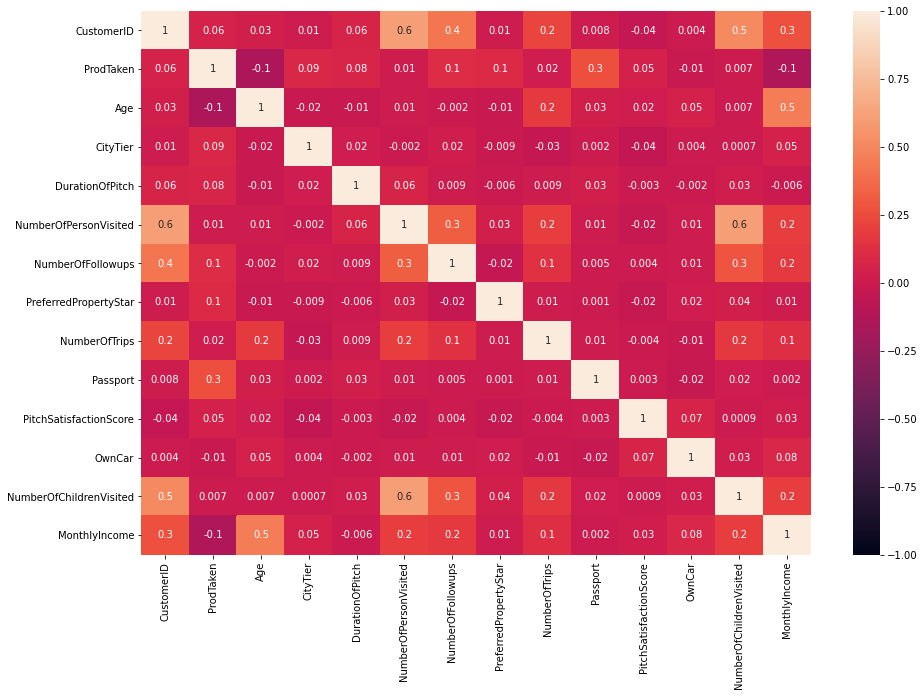

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

# 2.Illustrate the insights based on EDA
    Key meaningful observations on the relationship between variables

1. There are missing values in this dataset.
2. It is imbalanced data set, only 920 users purchased prod
3. Passport, Age, Monthly income seems to contribute more to the target varaible
4. There are few categorial variable
5. Gender has miss spelled data, that needs to be corrected
6. There are outliers in dataset, some of the features like montly income

# 3. Data Pre-processing
    Prepare the data for analysis 
    - Missing value Treatment, 
    - Outlier Detection(treat, if needed- why or why not ), 
    - Feature Engineering, 
    - Prepare data for modeling

In [338]:
# Missing values
#number of missing values in ratings dataset
pd.DataFrame(df.isnull().sum(), columns=['No of MissingValues'])

,No of MissingValues
CustomerID,0
ProdTaken,0
Age,226
TypeofContact,25
CityTier,0
DurationOfPitch,251
Occupation,0
Gender,0
NumberOfPersonVisited,0
NumberOfFollowups,45


In [339]:
# treat missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mean(), inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mean(), inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mean(), inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mean(), inplace=True)
df['NumberOfChildrenVisited'].fillna(df['NumberOfChildrenVisited'].mean(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

In [340]:
df.fillna(df['TypeofContact'].value_counts().index[0], inplace=True)


In [341]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.000000,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.000000,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.000000,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.000000,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.000000,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [342]:
df['TypeofContact'].value_counts()
df['Occupation'].value_counts()
df['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

In [343]:
rpl = {"Gender": {"Fe Male":"Female"}}
df.replace(rpl, inplace=True)

In [344]:
df['Gender'].value_counts()
df['ProductPitched'].value_counts()
df['MaritalStatus'].value_counts()
df['Designation'].value_counts()

Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64

In [345]:
replaceStruct = {
                "TypeofContact":     {"Self Enquiry": 1, "Company Invited": 2},
                "Occupation": {"Salaried": 1, "Small Business":2 , "Large Business": 3, "Free Lancer": 4},
                "Gender": {"Male": 1, "Female":2},
                "ProductPitched":{"Basic": 1, "Deluxe": 2 ,"Standard": 3 ,"Super Deluxe": 4 ,"King": 5},
                "MaritalStatus":     {"Married": 1, "Divorced": 2 ,"Single":3,"Unmarried":4},
                "Designation":     {"Executive": 1, "Manager": 2, "Senior Manager": 3, "AVP": 4,"VP":5 },
               }
oneHotCols=["TypeofContact","Occupation","Gender","ProductPitched","MaritalStatus","Designation"]

In [346]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head(10)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,...,ProductPitched_5,MaritalStatus_1,MaritalStatus_2,MaritalStatus_3,MaritalStatus_4,Designation_1,Designation_2,Designation_3,Designation_4,Designation_5
0,200000,1,41.000000,3,6.0,3,3.0,3.0,1.0,1,...,0,0,0,1,0,0,1,0,0,0
1,200001,0,49.000000,1,14.0,3,4.0,4.0,2.0,0,...,0,0,1,0,0,0,1,0,0,0
2,200002,1,37.000000,1,8.0,3,4.0,3.0,7.0,1,...,0,0,0,1,0,1,0,0,0,0
3,200003,0,33.000000,1,9.0,2,3.0,3.0,2.0,1,...,0,0,1,0,0,1,0,0,0,0
4,200004,0,37.622265,1,8.0,2,3.0,4.0,1.0,0,...,0,0,1,0,0,1,0,0,0,0
5,200005,0,32.000000,1,8.0,3,3.0,3.0,1.0,0,...,0,0,0,1,0,1,0,0,0,0
6,200006,0,59.000000,1,9.0,2,2.0,5.0,5.0,1,...,0,0,1,0,0,1,0,0,0,0
7,200007,0,30.000000,1,30.0,3,3.0,3.0,2.0,0,...,0,1,0,0,0,1,0,0,0,0
8,200008,0,38.000000,1,29.0,2,4.0,3.0,1.0,0,...,0,0,0,0,1,0,0,1,0,0
9,200009,0,36.000000,1,33.0,3,3.0,3.0,7.0,0,...,0,0,1,0,0,0,1,0,0,0


# 4. Model building - Bagging
    - Build bagging classifier, random forest and decision tree.

In [347]:
X = df.drop(columns=["ProdTaken","CustomerID"] , axis=1)
y = df.pop("ProdTaken")

In [348]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3421, 34) (1467, 34)


In [349]:
y.value_counts(1)

0    0.811784
1    0.188216
Name: ProdTaken, dtype: float64

In [350]:
y_test.value_counts(1)

0    0.811861
1    0.188139
Name: ProdTaken, dtype: float64

In [384]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [385]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Building Decision Tree Model

In [386]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=1)

In [387]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

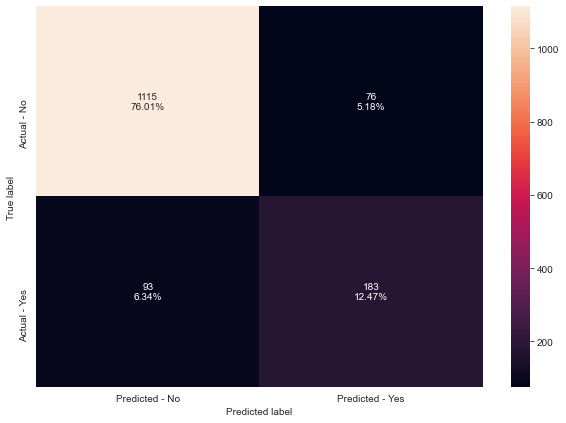

In [388]:
make_confusion_matrix(dtree,y_test)

In [391]:
dtree_acc = get_metrics_score(dtree)

Accuracy on training set :  1.0
Accuracy on test set :  0.8847989093387867
Recall on training set :  1.0
Recall on test set :  0.6630434782608695
Precision on training set :  1.0
Precision on test set :  0.7065637065637066


Observations:
Decision tree is overfitting the training data. 
The performance of the model is not that great. 


# Bagging Classifier

In [392]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

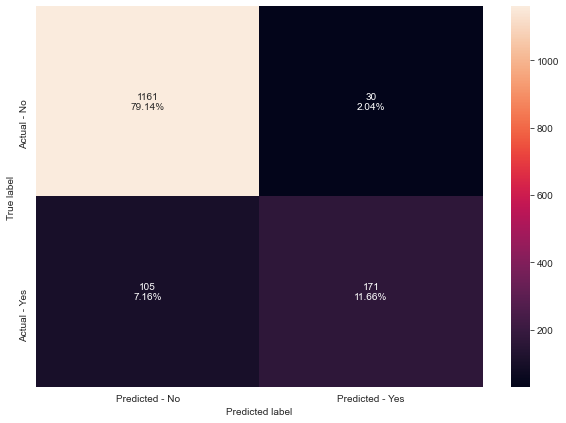

In [393]:
make_confusion_matrix(bagging,y_test)

In [394]:
bagging_acc = get_metrics_score(bagging)

Accuracy on training set :  0.9953230049693073
Accuracy on test set :  0.9079754601226994
Recall on training set :  0.9782608695652174
Recall on test set :  0.6195652173913043
Precision on training set :  0.9968354430379747
Precision on test set :  0.8507462686567164


Observation:
Bagging classifier is slightly better then decision tree. Accuracy of training and testing is bettern then decision tree and giving better Precision.


# Random Forest

In [395]:
rf = RandomForestClassifier(random_state=1,class_weight='balanced')
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

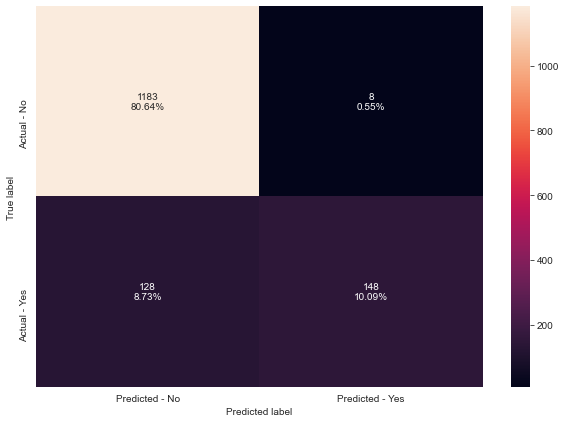

In [396]:
make_confusion_matrix(rf,y_test)

In [397]:
rf_acc = get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.907293796864349
Recall on training set :  1.0
Recall on test set :  0.5362318840579711
Precision on training set :  1.0
Precision on test set :  0.9487179487179487


Observation:
    Random Forest also overfitting the training model, accuracy is also 50%

# Tuning Decision Tree

In [408]:
from sklearn.model_selection import GridSearchCV

In [409]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1]
             }


# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=15,
                       min_impurity_decrease=1e-05, min_samples_leaf=10,
                       random_state=1)

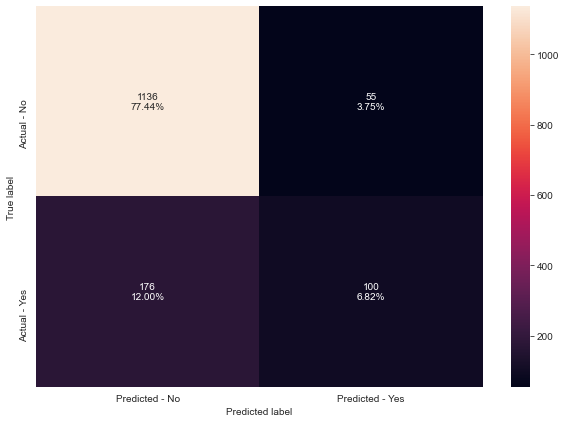

In [410]:
make_confusion_matrix(dtree_estimator,y_test)

In [411]:
tuned_dtree_acc = get_metrics_score(dtree_estimator)

Accuracy on training set :  0.8406898567670272
Accuracy on test set :  0.8425357873210634
Recall on training set :  0.37732919254658387
Recall on test set :  0.36231884057971014
Precision on training set :  0.627906976744186
Precision on test set :  0.6451612903225806


# Tunning Bagging classifier

In [412]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, cv = 5,n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1), n_jobs=-1,
             param_grid={'base_estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]})

In [413]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1),
                  max_features=0.8, n_estimators=101, random_state=1)

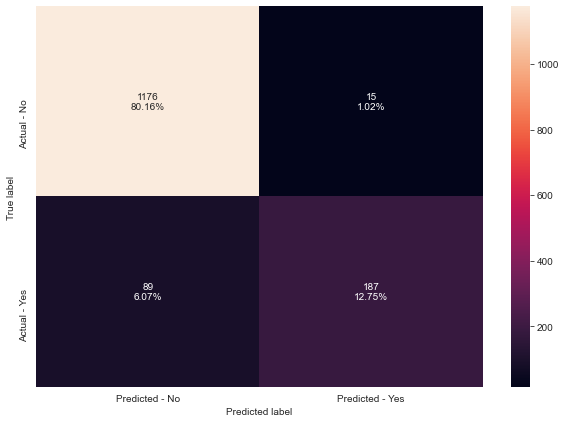

In [414]:
make_confusion_matrix(bagging_estimator,y_test)

In [415]:
tuned_bagging_acc= get_metrics_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.929107021131561
Recall on training set :  1.0
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.9257425742574258


# Tuning Random Forest

In [416]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1,oob_score=True,bootstrap=True)

# Grid of parameters to choose from
parameters = {  
                'max_features': ['sqrt','log2','auto'],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': list(np.linspace(10, 50, 10, dtype = int))}


# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=41, oob_score=True,
                       random_state=1)

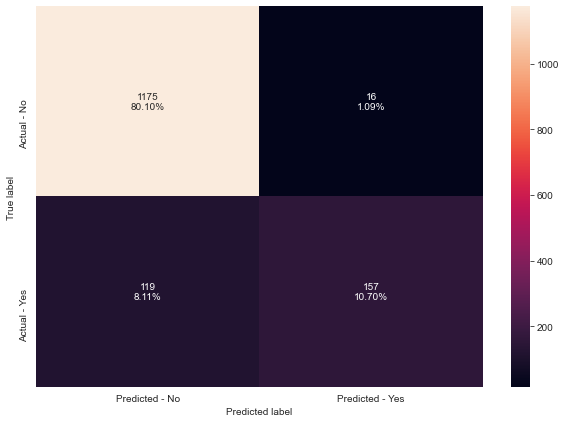

In [417]:
make_confusion_matrix(rf_estimator,y_test)

In [418]:
tuned_rf_acc = get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9079754601226994
Recall on training set :  1.0
Recall on test set :  0.5688405797101449
Precision on training set :  1.0
Precision on test set :  0.9075144508670521


# Random Forest with different parameters


In [419]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

In [402]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9102601578485823
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.5559006211180124
Recall on test set :  0.4057971014492754
Precision on training set :  0.9445910290237467
Precision on test set :  0.835820895522388


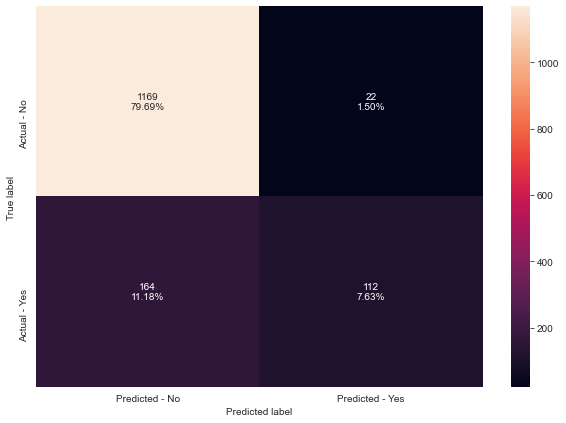

In [403]:
make_confusion_matrix(rf_estimator_tuned,y_test)

In [405]:
# Class weight change
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.5000000000000001,
                       max_samples=0.6000000000000001, min_samples_leaf=5,
                       n_estimators=250, random_state=1)

In [406]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9394913767904122
Accuracy on test set :  0.8793456032719836
Recall on training set :  0.7748447204968945
Recall on test set :  0.5108695652173914
Precision on training set :  0.8894830659536542
Precision on test set :  0.7704918032786885


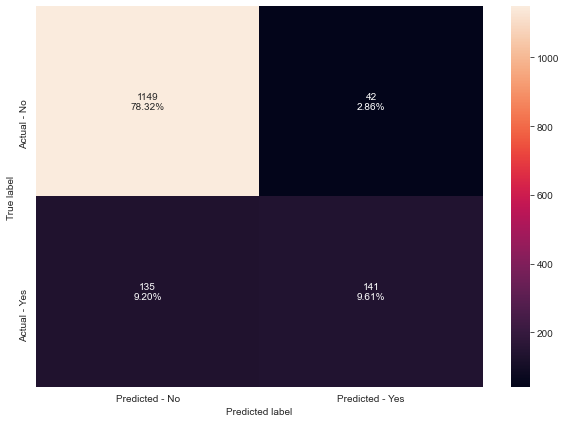

In [407]:
make_confusion_matrix(rf_estimator_weighted,y_test)

# Model performance evaluation and improvement
- Comment on which metric is right for model performance evaluation and why?
 Precision metrics is right for this model. False Negative means that customer will not buy the product but we ended up sending campaging to them hence budget loss. We have to minimize the False positve to reduce the cost. 
- Comment on model performance :Without parameter tuning: Both Decision tree and Random forst overfits the training data and performance was not that great. Bagging classifier sliglty performance better then these two model. It also showed slight better precision score.
        
- Can model performance be improved? check and comment:
Model can be improved by tuning the parameters. Decision Tree showed better result, its not overfitting with hyper paramertes. However the Precision rate decreased compared to decision tree without parameters.
Bagging classifier with parameters, given great precision rate however its still overfitting the training data.
Random Forest, with two different set of parameters its overfitting the training data even though precision value is high. Random Forest with class weight also overfitting the data, even thought it showed slight improvement.


        

# 6. Model building - Boosting
    - Build Adaboost, gradient boost, xgboost and stacking classifier

# Adaboost

In [420]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

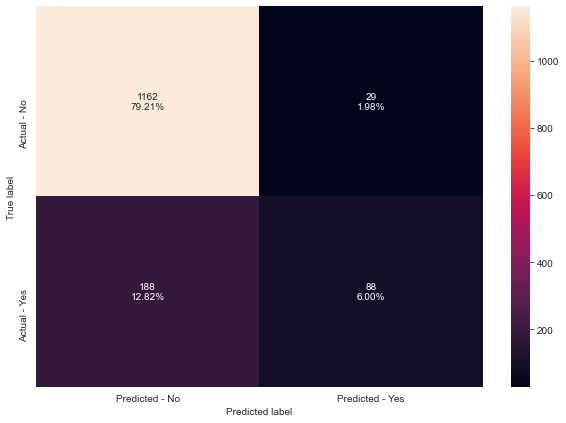

In [421]:
make_confusion_matrix(abc,y_test)

In [422]:
#Using above defined function to get accuracy on train and test set
abc_acc = get_metrics_score(abc)

Accuracy on training set :  0.8456591639871383
Accuracy on test set :  0.8520790729379687
Recall on training set :  0.3105590062111801
Recall on test set :  0.3188405797101449
Precision on training set :  0.704225352112676
Precision on test set :  0.7521367521367521


# Gradient boost

In [423]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

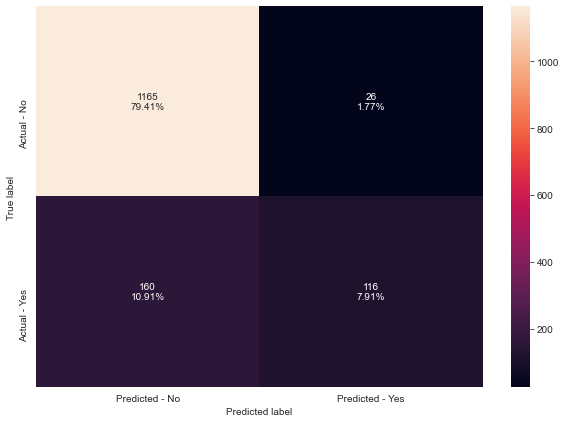

In [424]:
make_confusion_matrix(gbc,y_test)

In [425]:
#Using above defined function to get accuracy on train and test set
gbm_acc = get_metrics_score(gbc)

Accuracy on training set :  0.8857059339374452
Accuracy on test set :  0.8732106339468303
Recall on training set :  0.45962732919254656
Recall on test set :  0.42028985507246375
Precision on training set :  0.8731563421828908
Precision on test set :  0.8169014084507042


# XGBoost 

In [426]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

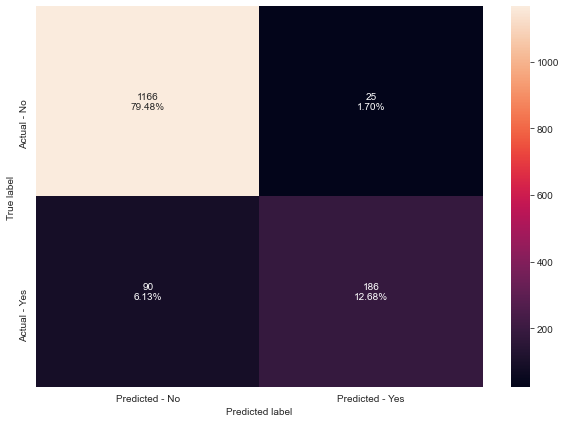

In [427]:
make_confusion_matrix(xgb,y_test)

In [428]:
#Using above defined function to get accuracy on train and test set
xgb_acc = get_metrics_score(xgb)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9216087252897068
Recall on training set :  0.9968944099378882
Recall on test set :  0.6739130434782609
Precision on training set :  1.0
Precision on test set :  0.8815165876777251


# HyperParameter tuning

In [429]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.8, n_estimators=90, random_state=1)

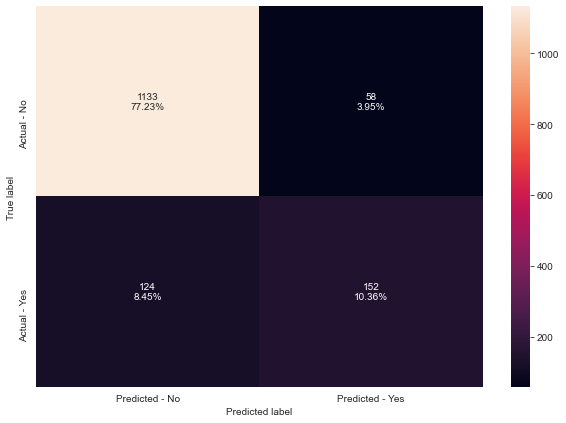

In [430]:
make_confusion_matrix(abc_tuned,y_test)

In [431]:
#Using above defined function to get accuracy on train and test set
tuned_abc_acc = get_metrics_score(abc_tuned)

Accuracy on training set :  0.9748611517100263
Accuracy on test set :  0.8759372869802318
Recall on training set :  0.8913043478260869
Recall on test set :  0.5507246376811594
Precision on training set :  0.9728813559322034
Precision on test set :  0.7238095238095238


# Gradient boost


In [435]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

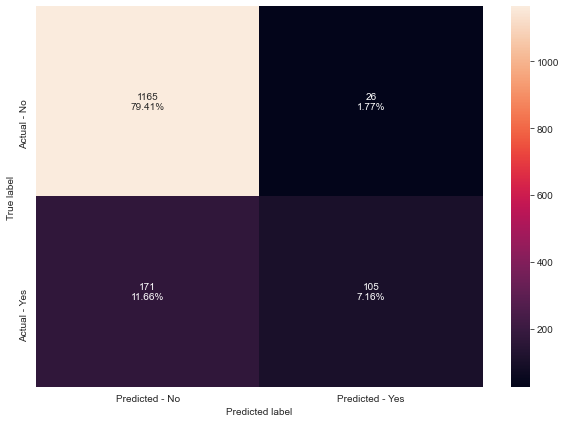

In [436]:
make_confusion_matrix(gbc_init,y_test)

In [437]:
#Using above defined function to get accuracy on train and test set
gbc_acc_init = get_metrics_score(gbc_init)

Accuracy on training set :  0.8886290558316282
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.45962732919254656
Recall on test set :  0.3804347826086957
Precision on training set :  0.8996960486322189
Precision on test set :  0.8015267175572519


In [438]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations


# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.9)

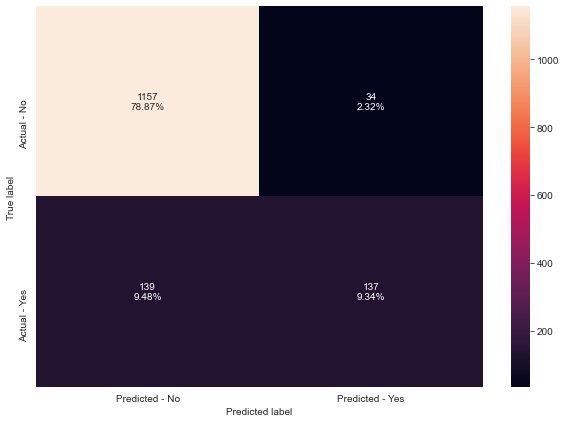

In [439]:
make_confusion_matrix(gbc_tuned,y_test)

In [440]:
#Using above defined function to get accuracy on train and test set
tuned_gbc = get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9225372698041509
Accuracy on test set :  0.8820722563053851
Recall on training set :  0.6288819875776398
Recall on test set :  0.4963768115942029
Precision on training set :  0.9396751740139211
Precision on test set :  0.8011695906432749


# XGBoost

In [441]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(30,100,20),
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.001,0.01,0.05,0.1],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

In [442]:
# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

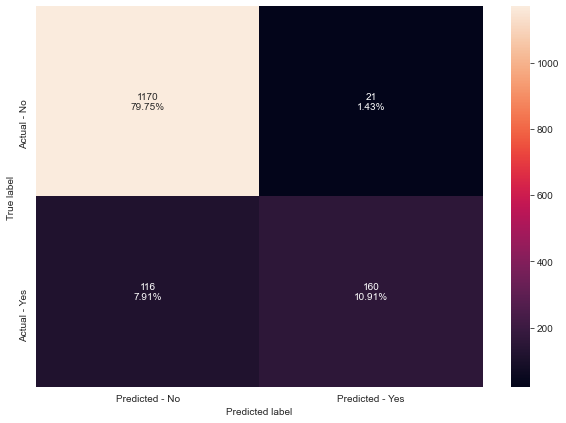

In [443]:
make_confusion_matrix(xgb_tuned,y_test)

In [444]:
#Using above defined function to get accuracy on train and test set
tuned_xgb_acc = get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9655071616486407
Accuracy on test set :  0.9066121336059987
Recall on training set :  0.8198757763975155
Recall on test set :  0.5797101449275363
Precision on training set :  0.9962264150943396
Precision on test set :  0.8839779005524862


# 7. Model performance evaluation and improvement
    - Comment on which metric is right for model performance evaluation and why? 
    - Comment on model performance 
    - Can model performance be improved? check and comment

Precision metrics is right for this model. False Negative means that customer will not buy the product but we ended up sending campaging to them hence budget loss. We have to minimize the False positve to reduce the cost. 

Ada Boost: Ada boost did good than previous models, it did not overfit the training data and also 70% precision
Gradient Boost: Gradient is even better than Ada boost, it did not overfit and also showed 80% in precision. Precision rate increased. 
XGBoost: Even though it showed slight improvement in performance, it was slighlty overfitting the training model.

Hyper tuning parameters insights:
Ada Boost: It is overfitting the training and performance is not good
Gradient boosting with Adaboost as base estimater provieded better result. Gradient boosting with hyperparameter showed same performance as Gradient boost with Adaboost as base estiamter, but it was sligtly overfitting the training data.
XGBoost with hyper parameters did not overfit the data and also performance better. Showed slight improvement in precision rate.





# 8. Actionable Insights & Recommendations
    - Compare models - Business recommendations and insights

In [452]:
# defining list of models
models = [dtree,dtree_estimator,bagging,bagging_estimator,rf,rf_estimator,abc,gbc,xgb,abc_tuned,gbc_init,gbc_tuned,xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [453]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree','Tuned Decision Tree','Bagging Classifier',
                                          'Tuned Bagging Classifier',
                                          'Random Forest','Tuned Random Forest','Adaboost Classifier',
                                          'Gradient Boosting Classifier','XGBoost classifier',
                                          'Tuned Adaboost Classifier','Gradient Boosting Classifier with Adaboost'
                                          ,'Tuned Gradient Boosting Classifier',
                                          'Tuned XGBoost Classifier'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,1.00,0.88,1.00,0.66,1.00,0.71
1,Tuned Decision Tree,0.84,0.84,0.38,0.36,0.63,0.65
2,Bagging Classifier,1.00,0.91,0.98,0.62,1.00,0.85
3,Tuned Bagging Classifier,1.00,0.93,1.00,0.68,1.00,0.93
4,Random Forest,1.00,0.91,1.00,0.54,1.00,0.95
5,Tuned Random Forest,1.00,0.91,1.00,0.57,1.00,0.91
6,Adaboost Classifier,0.85,0.85,0.31,0.32,0.70,0.75
7,Gradient Boosting Classifier,0.89,0.87,0.46,0.42,0.87,0.82
8,XGBoost classifier,1.00,0.92,1.00,0.67,1.00,0.88
9,Tuned Adaboost Classifier,0.97,0.88,0.89,0.55,0.97,0.72


Insight:
All the model have performed well on training data, but to some extend provided similar result in test data. Most of the model tend to overfit to training data.

Tuned Decision tree, Adaboost classifier, Gradient boosting, Gradient boost with adaboost provided generalized result. But there is performance difference in each of these models. 

Gradient boosting classifier provided generalized result on both test and train data and also resulted in highest precsion. 

Rest of the model either overfitting the training data or providing low precision rate.

# Feature importance

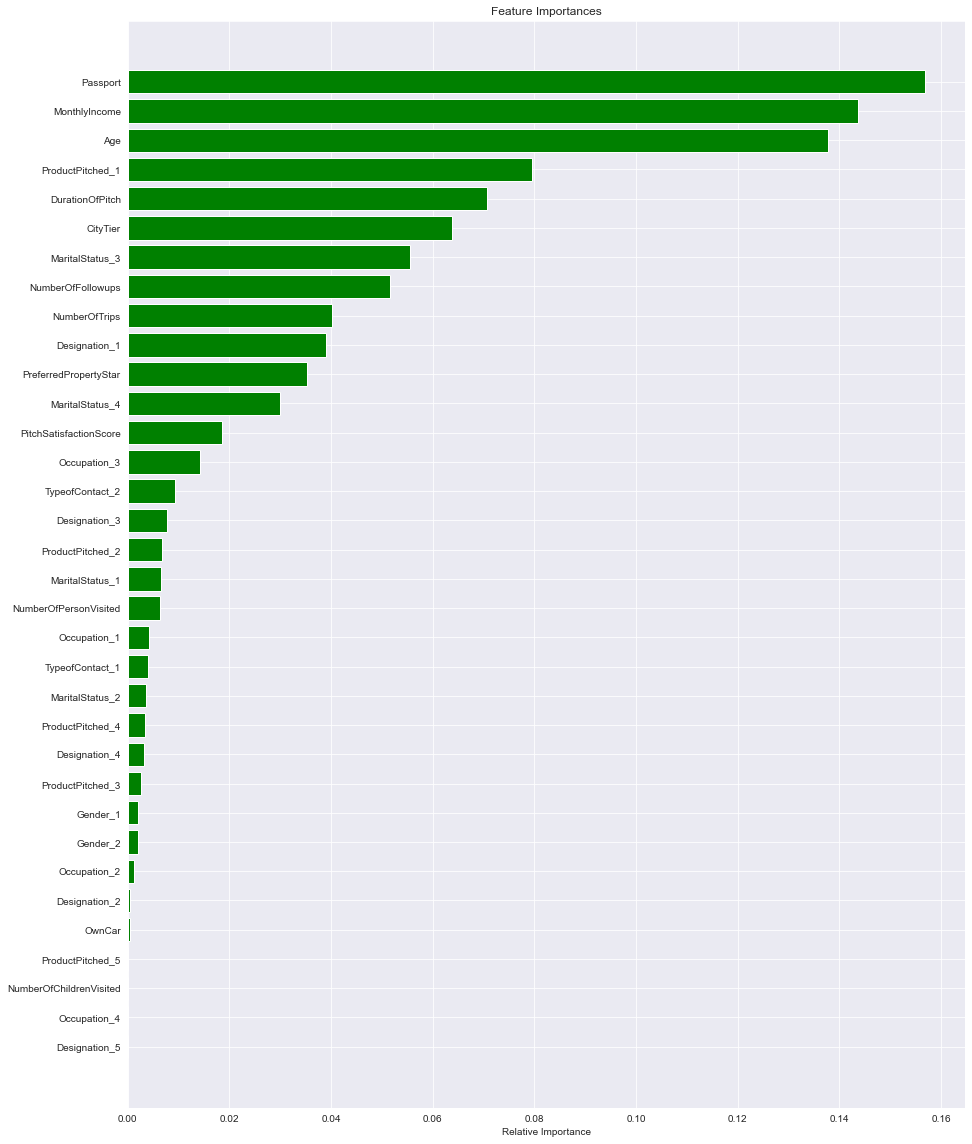

In [455]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='Green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport, Income,Age, Prodcut pitched, duration of the pitch are five most important features to predict the model

# Business Insights

"Visit with us"  wants to increase to user base by introducing new packages and also they wanted to reduce the marketing budget. Instead of contacting random customers about the new packages, they wanted to spend money on customer who will buy the package. The Visit with us main aim is reduce the marketing budget and increase the user base, so there should be trade off between losing an oppotrunity (to gain user base by spending marketing money) in case of FP and losing the money in case of False Negative. Here precision is the metric of interest and model has been tuned on Precision. At the same time other metrics should not be ignored. The company can use choose the model that provides highest precision and generalized result. The company might lose some potential customers buy they have can marketing budget. Its the tradeoff between lossing new customer vs reduce budget. 

So in this case recommendation would be to use Gradient boost classifier model that provided genralized result in both training and testing data, and performed with high precision score compared with other model. Policy maker and Marketing team can use this model that 82% of the time can identify a customer who will purchase the new package. and that will help them to increase the user base. This wil reduce their marketing budget instead of contacting random customer, they can contact specific customers.

